In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Single Variate Linear Regression

This example shows how to compute and plot the optimal solution for single variale linear regression via gradient descent. We will use a subset of the Boston Housing dataset to showcase the model.

*First, we will load the dataset.*

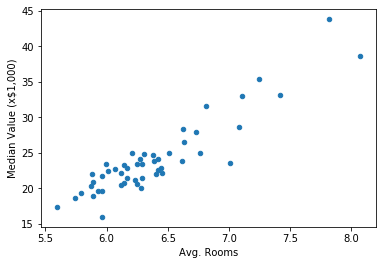

In [2]:
from sklearn.datasets import load_boston
bd = load_boston()
boston = pd.DataFrame(bd.data, columns=bd.feature_names)
boston['MEDV'] = bd.target
boston.iloc[50:100,:].plot.scatter(x='RM', y='MEDV')
plt.xlabel('Avg. Rooms')
plt.ylabel('Median Value (x$1,000)')
plt.show()

**bd.DESCR** gives us information about the features:

**CRIM**: Per capita crime rate by town  
**ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft  
**INDUS**: Proportion of non-retail business acres per town  
**CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
**NOX**: Nitric oxide concentration (parts per 10 million)  
**RM**: Average number of rooms per dwelling  
**AGE**: Proportion of owner-occupied units built prior to 1940  
**DIS**: Weighted distances to five Boston employment centers  
**RAD**: Index of accessibility to radial highways  
**TAX**: Full-value property tax rate per \$10,000  
**PTRATIO**: Pupil-teacher ratio by town  
**B**: 1000(Bk — 0.63)^2, where Bk is the proportion of [people of African American descent] by town  
**LSTAT**: Percentage of lower status of the population  
**MEDV**: Median value of owner-occupied homes in \$1000s

In [3]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


We're going to pick one of the variables, RM, and predict the response, MEDV, from its values. To make things easier to visualize, we're only going to pick 50 samples from the dataset.

In [4]:
data = boston.loc[51:100,['RM', 'MEDV']].to_numpy()
x = data[:,0]
y = data[:,1]
x, y, x.shape

(array([6.115, 6.511, 5.998, 5.888, 7.249, 6.383, 6.816, 6.145, 5.927,
        5.741, 5.966, 6.456, 6.762, 7.104, 6.29 , 5.787, 5.878, 5.594,
        5.885, 6.417, 5.961, 6.065, 6.245, 6.273, 6.286, 6.279, 6.14 ,
        6.232, 5.874, 6.727, 6.619, 6.302, 6.167, 6.389, 6.63 , 6.015,
        6.121, 7.007, 7.079, 6.417, 6.405, 6.442, 6.211, 6.249, 6.625,
        6.163, 8.069, 7.82 , 7.416, 6.727]),
 array([20.5, 25. , 23.4, 18.9, 35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. ,
        22.2, 25. , 33. , 23.5, 19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8,
        23.4, 24.1, 21.4, 20. , 20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9,
        23.9, 26.6, 22.5, 22.2, 23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6,
        28.4, 21.4, 38.7, 43.8, 33.2, 27.5]),
 (50,))

Next, we will find the best model via Gradient Descent.

In [5]:
def gradient(t, X, y):
    """Compute the current error and gradient."""
    # Hypothesis/estimate values for y
    y_estimate = X.dot(t).flatten()
    # Loss - the difference between the estimated and actual values of y
    loss = y.flatten() - y_estimate
    m = float(len(X))
    # Compute gradient
    grad = -(1.0 / m) * loss.dot(X)
    # Cost function value
    cost = (0.5 / m) * np.sum(np.power(loss, 2))
    return grad, cost

def compute_cost(t, X, y):
    """Compute the current error/cost."""
    y_estimate = X.dot(t).flatten()
    loss = y.flatten() - y_estimate
    m = float(len(X))
    return (0.5 / m) * np.sum(np.power(loss, 2))

def gradient_descent(x, y, alpha=0.5, tolerance=1e-5, maxit=1e+6, nulbias=False):
    """Finds the best line fit for predicting y given x.
       Keep track of and also return tested models, gradients, and errors 
       along the optimization path.
    """
    # add intercept term to x -- acounts for the bias -- and normalize x's
    X = np.vstack((np.ones_like(x), x/x.max())).T
    # start with a random (or zeros) theta vector
    t = np.random.randn(2)
    if nulbias:
        t[0] = 0
    # perform gradient descent
    it = 0
    models = []
    grads = []
    errors = []
    while it < maxit:
        grad, error = gradient(t, X, y)
        models.append(t)
        grads.append(grad)
        errors.append(error)
        new_t = t - alpha * grad
        if nulbias:
            new_t[0] = 0
        # check whether we should stop
        if np.sum(abs(new_t - t)) < tolerance:
            break
        # update theta
        t = new_t
        it += 1
    if it == maxit:
        print("Warning: reached maximum number of iterations without convergence.")
    return X, t, models, grads, errors

def plotmodel(x, y, t, start_at_zero=False):
    """Plot the line of a given model."""
    if t is not None:
        if start_at_zero:
            x = np.append([0], x)
            y = np.append([0], y)
        plt.plot(x, t[0] + x/x.max() * t[1], c='g', label='Model')
#         equivalent to:
#         X = np.vstack((np.ones_like(x), x/x.max())).T
#         plt.plot(x, X.dot(t), c='g', label='Model')
    plt.scatter(x, y, c='b', label='Data')
    plt.legend(loc='best')
    plt.xlabel('Avg. Rooms')
    plt.ylabel('Median Price (x$1,000)')
    if start_at_zero:
        plt.ylim(ymin=0)
        plt.xlim(xmin=0)
    plt.show()

Let's see what our data looks like by plotting the response ($y$) in terms of the predictor ($x$). We can choose any line in the plane to be a model for predicting the response.

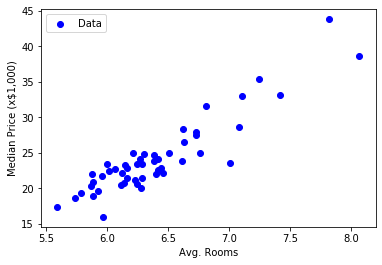

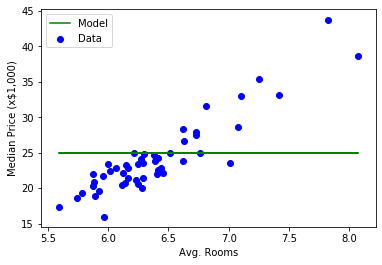

In [6]:
plotmodel(x, y, None)
plotmodel(x, y, np.array([25, 0]))

Initially, let's assume that we don't actually have a bias term. This will make visualizing the parameter space easier. We'll find the best model and plot a few models along the way, specifically, the initial random model and models after traversing each quarter of the search space.

# iterations:  38
first model:  [0.         0.08992052]
best model:  [ 0.        30.8960387]
Iteration:  1
Gradient:  [-24.20070837 -19.48433891]
Error:  306.4584010110138


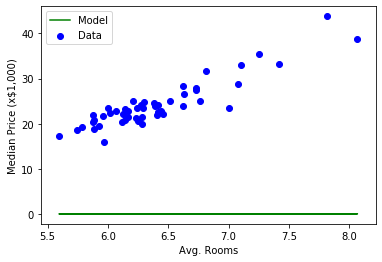

Iteration:  10
Gradient:  [-0.57458613 -0.63652049]
Error:  6.660036054967957


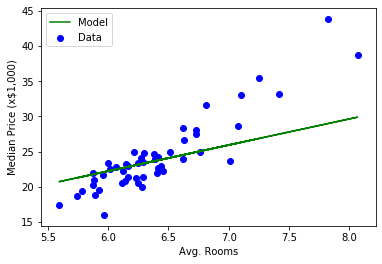

Iteration:  20
Gradient:  [ 0.20548251 -0.01421812]
Error:  6.339903622044385


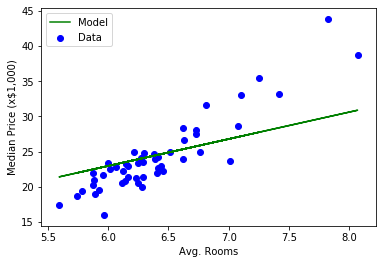

Iteration:  28
Gradient:  [ 0.22245368 -0.00067931]
Error:  6.33974417616841


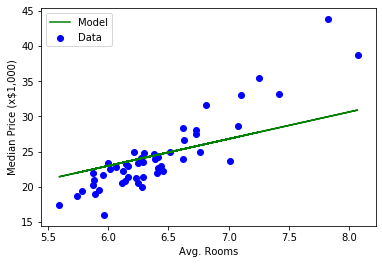

Iteration:  38
Gradient:  [ 2.23286182e-01 -1.51738399e-05]
Error:  6.339743811551734


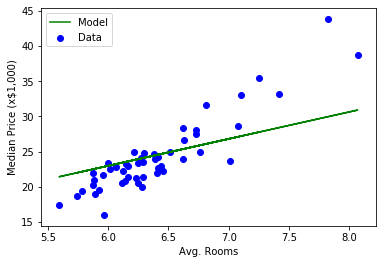

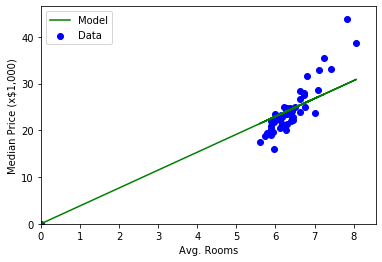

In [7]:
X, t, models, grads, errors = gradient_descent(x, y, nulbias=True)
print("# iterations: ", len(models))
print("first model: ", models[0])
print("best model: ", t)

nits = len(models)
ts = [0, nits//4, nits//2, 3*(nits//4), nits-1] # quartles
for i in ts:
    print("Iteration: ", i+1)
    print("Gradient: ", grads[i])
    print("Error: ", errors[i])
    plotmodel(x, y, models[i])
plotmodel(x, y, models[-1], True)

We can plot the cost function in terms of the $\theta$ value. Note that, as $\theta$ gets closer to the optimum value, the distance traveled decreases, even through the step size $\alpha$ remains constant. After 10 steps, the cost function was only 0.34 away from its optimum value.

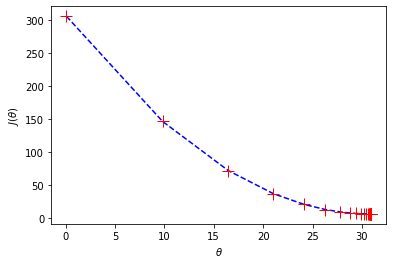

In [8]:
plt.plot([m[1] for m in models], errors, 'b+--', markersize=12, markeredgecolor='r')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$J(\theta)$')
plt.show()

If we also consider the bias term, the optimization takes slightly longer, but is able to fit the evidence much better.

# iterations:  7955
first model:  [0.25646588 0.7085072 ]
best model:  [-36.17460919  76.24165059]
Iteration:  1
Gradient:  [-23.45380882 -18.88976012]
Error:  288.47866897620287


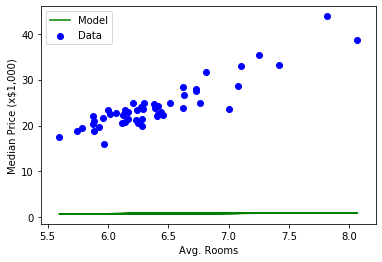

Iteration:  1989
Gradient:  [ 0.01125934 -0.01416746]
Error:  2.3687141100773674


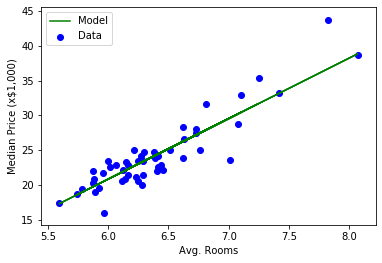

Iteration:  3978
Gradient:  [ 0.00103877 -0.00130707]
Error:  2.3009238608515337


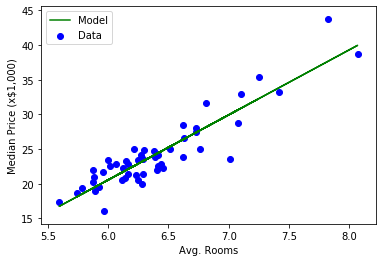

Iteration:  5965
Gradient:  [ 9.60656424e-05 -1.20877935e-04]
Error:  2.3003468770420543


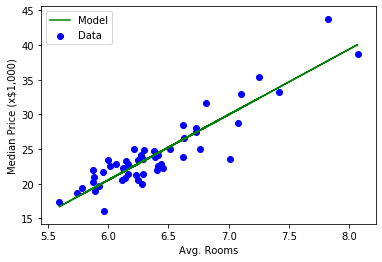

Iteration:  7955
Gradient:  [ 8.85227479e-06 -1.11386826e-05]
Error:  2.3003419420528877


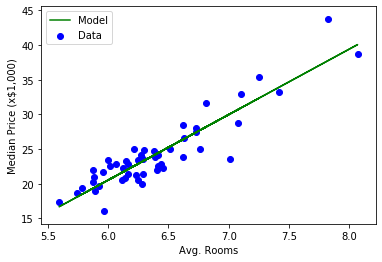

In [9]:
X, t, models, grads, errors = gradient_descent(x, y)
print("# iterations: ", len(models))
print("first model: ", models[0])
print("best model: ", t)

nits = len(models)
ts = [0, nits//4, nits//2, 3*(nits//4), nits-1] # quartles
for i in ts:
    print("Iteration: ", i+1)
    print("Gradient: ", grads[i])
    print("Error: ", errors[i])
    plotmodel(x, y, models[i])

Since $\theta$ is now a vector with two features, we will plot the cost function in 3D space in terms of the two possible values for $\theta$ and the cost function response $J(\theta)$.

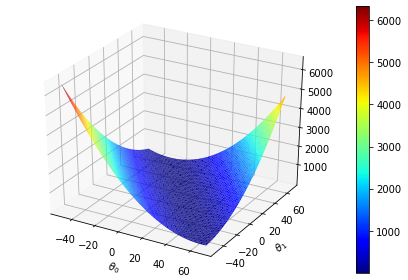

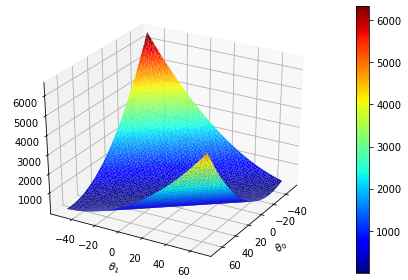

In [10]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

def plotcost(X, y, start=-100, end=100, step=2, rotate=False):
    """Construct a 3D plot of the cost function range."""
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    t0s = []
    t1s = []
    errors = []
    for t0 in np.arange(start, end, step):
        for t1 in np.arange(start, end, step):
            t0s.append(t0)
            t1s.append(t1)
            errors.append(compute_cost(np.array([t0, t1]), X, y))
    
    surf = ax.plot_trisurf(t0s, t1s, errors, cmap=cm.jet, linewidth=0.2)
    fig.colorbar(surf)
    plt.xlabel(r'$\theta_0$')
    plt.ylabel(r'$\theta_1$')

    if rotate:
        ax.view_init(30, 30)

    fig.tight_layout()
    plt.show()
    
plotcost(X, y, start=-50, end=70)
plotcost(X, y, start=-50, end=70, rotate=True)

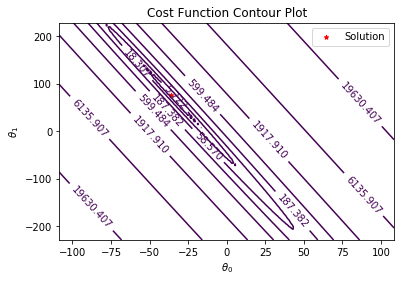

In [11]:
def plotcost_contour(X, y, t):
    t0 = np.linspace(-t[0]*3, t[0]*3, 100)
    t1 = np.linspace(-t[1]*3, t[1]*3, 100)
    J_vals = np.zeros(shape=(t0.size, t1.size))

    for i1, e1 in enumerate(t0):
        for i2, e2 in enumerate(t1):
            wT = [e1, e2]
            J_vals[i1, i2] = compute_cost(wT, X, y)

    plt.scatter(t[0], t[1], marker='*', color='r', s=20, label='Solution')
    cplt = plt.contour(t0, t1, J_vals, np.logspace(-25,25,100))
    plt.clabel(cplt, inline=1, fontsize=10)
    plt.title("Cost Function Contour Plot")
    plt.xlabel(r'$\theta_0$')
    plt.ylabel(r'$\theta_1$')
    plt.legend(loc='best')
    plt.show()

plotcost_contour(X, y, t)